## Analyze oscillations in conduino timeseries

Runs to use:

a) $f_0$=0.7 s$^{-1}$, $\Delta f_1$=0.05 s$^{-1}$, $\Delta t_1$=16.8 s

* 28mar19 - low N
* 09apr19 - high N

$T = 2\pi/f=8.98$ s

b) $f_0$=0.5 s$^{-1}$, $\Delta f_1$=0.04 s$^{-1}$, $\Delta t_1$=21 s

* 03jul19 - low N
* 04jul19 - high N
* 05jul19 - highest N

$T = 2\pi/f=12.57$ s

In [5]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import conduino_tools as ctools
import profiler_tools as ptools


In [6]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [15]:
def plot_uprofile(ax,t0,t1, col='0.8'):
    ax.axvline(t0, color=col, linestyle=':')
    ax.axvline(t1, color=col, linestyle=':')
    ax.axvline(0.0, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1, col='g'):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    #ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    #ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], '-', color=col)
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### Forcing

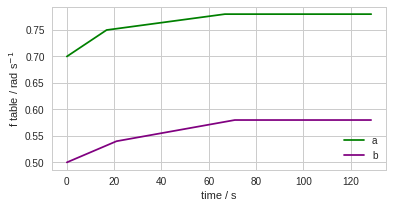

In [17]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0_a = 0.7 # initial f rad/s
f1_a = 0.75 # rad/s
f2_a = 0.78 # rad/s
t0_a = 16.8 # s
t1_a = 50.0 + t0_a # s
exp_file_a = '../experiments/exp_03jul19/experiment01.mat'

plot_forcing(ax0, exp_file_a, f0_a, f1_a, f2_a, t0_a, t1_a)

f0_b = 0.50 # initial f rad/s
f1_b = 0.54 # rad/s
f2_b = 0.58 # rad/s
t0_b = 21.0 # s
t1_b = 50 + t0_b # s
exp_file_b = '../exp_28mar19/experiment_2.mat'

plot_forcing(ax0, exp_file_b, f0_b, f1_b, f2_b, t0_b, t1_b, col='purple')

labels = ['a', 'b']
ax0.legend(labels)

### Experiments

../exp_28mar19/experiment_2.mat
../exp_09apr19/experiment.mat
../experiments/exp_03jul19/experiment01.mat
../experiments/exp_04jul19/experiment01.mat
../experiments/exp_05jul19/experiment01.mat


Text(0.5,1,'Probe density')

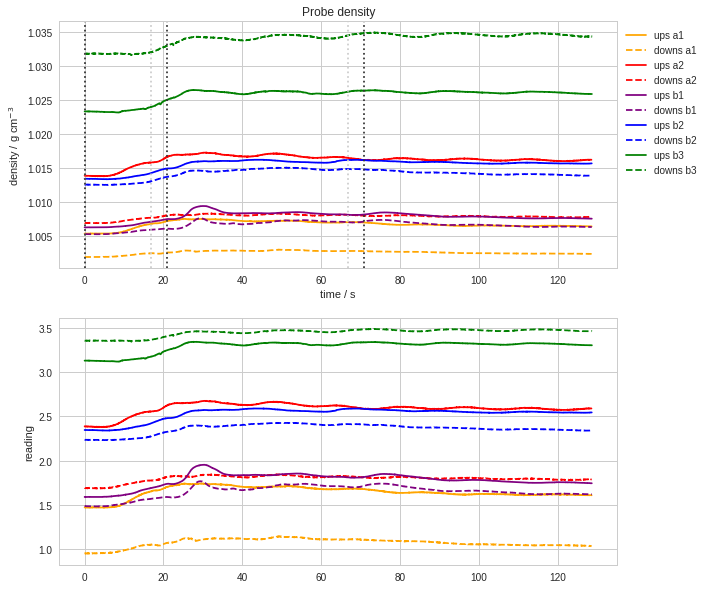

In [102]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,10))
labels = [['ups a1','downs a1'],['ups a2', 'downs a2'],['ups b1', 'downs b1'],
          ['ups b2', 'downs b2'],['ups b3', 'downs b3']]
colors = ['orange','red','purple', 'blue', 'green']
calib = ['a','a','b','b','c']
files = ['../exp_28mar19/experiment_2.mat',
         '../exp_09apr19/experiment.mat',
         '../experiments/exp_03jul19/experiment01.mat',
         '../experiments/exp_04jul19/experiment01.mat',
         '../experiments/exp_05jul19/experiment01.mat'
        ]

ns = 3000
ups_density = np.zeros((3000,len(files)))
dns_density = np.zeros_like(ups_density)
times = np.zeros_like(ups_density)

for filepath, lab, col, ii in zip(files, labels, colors, range(len(files))):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    times[:,ii] = time
    if calib == 'a':
        ups_density[:,ii] = ctools.densANK1_29Mar19(P1)
        dns_density[:,ii] = ctools.densANK2_29Mar19(P2)
        
    elif calib =='b':
        ups_density[:,ii] = ctools.densANK1_02May19(P1)
        dns_density[:,ii] = ctools.densANK2_02May19(P2)
    else:
        ups_density[:,ii] = ctools.densANK1_06Jul19(P1)
        dns_density[:,ii] = ctools.densANK2_06Jul19(P2)
    
    ax0.plot(times[:,ii],ups_density[:,ii],'-', label=lab[0], color=col)
    ax0.plot(times[:,ii],dns_density[:,ii],'--', label=lab[1], color=col)
    
    ax1.plot(times[:,ii],P1,'-', label=lab[0], color=col)
    ax1.plot(times[:,ii],P2,'--', label=lab[1], color=col)

plot_uprofile(ax0,t0_a,t1_a)
plot_uprofile(ax0,t0_b,t1_b, col='0.2')

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax1.set_ylabel('reading')

ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


Text(0.5,1,'Probe density minus initial density (f=0.5 rad/s)')

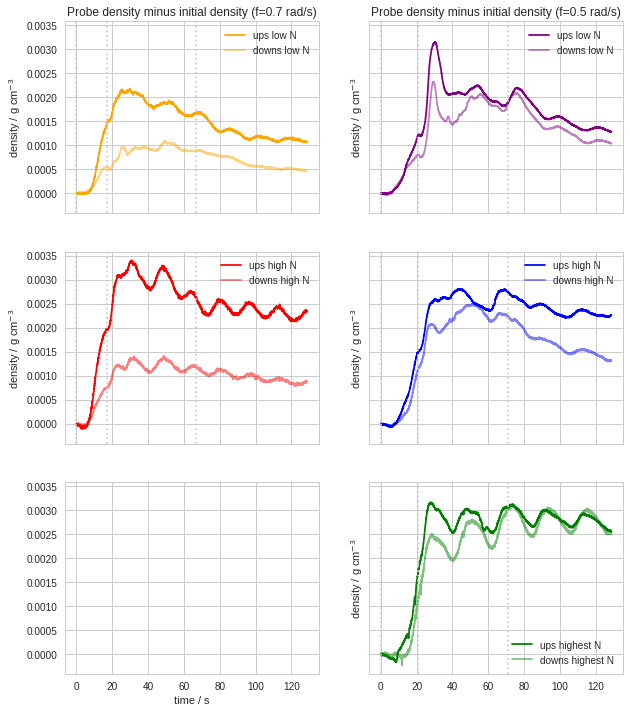

In [103]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(3,2, figsize=(10,12), sharey=True, sharex=True)
labels = [['ups low N','downs low N'],['ups high N', 'downs high N'],['ups low N', 'downs low N'],
          ['ups high N', 'downs high N'],['ups highest N', 'downs highest N']]
colors = ['orange','red','purple', 'blue', 'green']
axs = [ax0,ax2,ax1,ax3,ax5]
forcing = ['a','a','b','b','b']

for lab, col, ii, ax, forc in zip(labels, colors, range(len(colors)), axs, forcing):
    
    ax.plot(times[:,ii],ups_density[:,ii]-ups_density[:,ii][0],'-', label=lab[0], color=col)
    ax.plot(times[:,ii],dns_density[:,ii]-dns_density[:,ii][0],'-', label=lab[1], color=col, alpha=0.5)
    
    if forc == 'a':
        plot_uprofile(ax,t0_a,t1_a)
    else:
        plot_uprofile(ax,t0_b,t1_b)

    ax.legend()
    ax.set_ylabel('density / g cm$^{-3}$')
ax4.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density (f=0.7 rad/s)')
ax1.set_title('Probe density minus initial density (f=0.5 rad/s)')


Results are very sensitive to calibration! using calibration may 2 or july 6 changes which canyon gets larger changes in density

Text(0.5,1,'Probe density minus initial density - remove $(f/2)/2\\pi$')

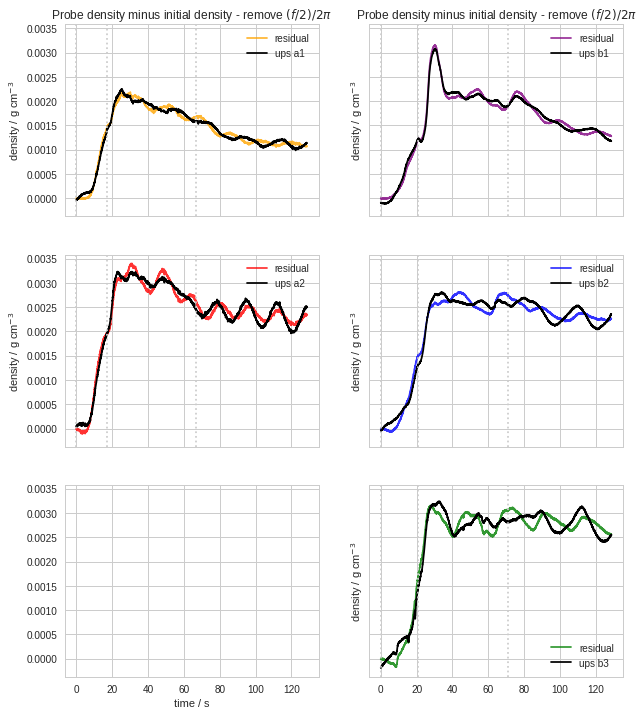

In [104]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(3,2, figsize=(10,12), sharey=True, sharex=True)
labels = [['ups a1','downs a1'],['ups a2', 'downs a2'],['ups b1', 'downs b1'],
          ['ups b2', 'downs b2'],['ups b3', 'downs b3']]
colors = ['orange','red','purple', 'blue', 'green']
axs = [ax0,ax2,ax1,ax3,ax5]
forcing = ['a','a','b','b','b']
fs = [0.7,0.7,0.5,0.5,0.5]
for lab, col, ii, ax, forc, f in zip(labels, colors, range(len(colors)), axs, forcing, fs):
    
    f0 = (f/2)/(2*np.pi) # f/2 is omega, table speed in rad/s, /2pi to get rid of rad
   
    res_ups, har_ups = ctools.filter_freq(times[:,ii],ups_density[:,ii]-ups_density[:,ii][0],f0)
    ax.plot(times[:,ii],ups_density[:,ii]-ups_density[:,ii][0],'-', label='residual', color=col, alpha=0.8)
    ax.plot(times[:,ii],res_ups,'-', label=lab[0], color='k')
    
    if forc == 'a':
        plot_uprofile(ax,t0_a,t1_a)
    else:
        plot_uprofile(ax,t0_b,t1_b)

    ax.legend()
    ax.set_ylabel('density / g cm$^{-3}$')
ax4.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density - remove $(f/2)/2\pi$')
ax1.set_title('Probe density minus initial density - remove $(f/2)/2\pi$')

Text(0.5,1,'Probe density minus initial density - remove $(f/2)/2\\pi$')

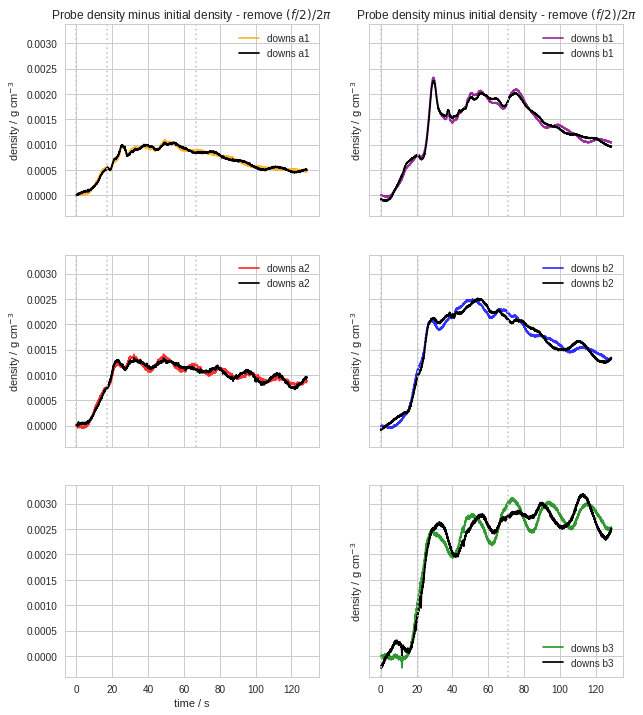

In [121]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(3,2, figsize=(10,12), sharey=True, sharex=True)
labels = [['ups a1','downs a1'],['ups a2', 'downs a2'],['ups b1', 'downs b1'],
          ['ups b2', 'downs b2'],['ups b3', 'downs b3']]
colors = ['orange','red','purple', 'blue', 'green']
axs = [ax0,ax2,ax1,ax3,ax5]
forcing = ['a','a','b','b','b']
fs = [0.7,0.7,0.5,0.5,0.5]
for lab, col, ii, ax, forc, f in zip(labels, colors, range(len(colors)), axs, forcing, fs):
    
    f0 = (f/2)/(2*np.pi) # f/2 is omega, table speed in rad/s, /2pi to get rid of rad
   
    res_dns, har_dns = ctools.filter_freq(times[:,ii],dns_density[:,ii]-dns_density[:,ii][0],f0)
    ax.plot(times[:,ii],dns_density[:,ii]-dns_density[:,ii][0],'-', label=lab[1], color=col, alpha=0.8)
    ax.plot(times[:,ii],res_dns,'-', label=lab[1], color='k')
    
    if forc == 'a':
        plot_uprofile(ax,t0_a,t1_a)
    else:
        plot_uprofile(ax,t0_b,t1_b)

    ax.legend()
    ax.set_ylabel('density / g cm$^{-3}$')
ax4.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density - remove $(f/2)/2\pi$')
ax1.set_title('Probe density minus initial density - remove $(f/2)/2\pi$')

Text(0.5,1,'Probe density minus initial density - remove $(f)/2\\pi$')

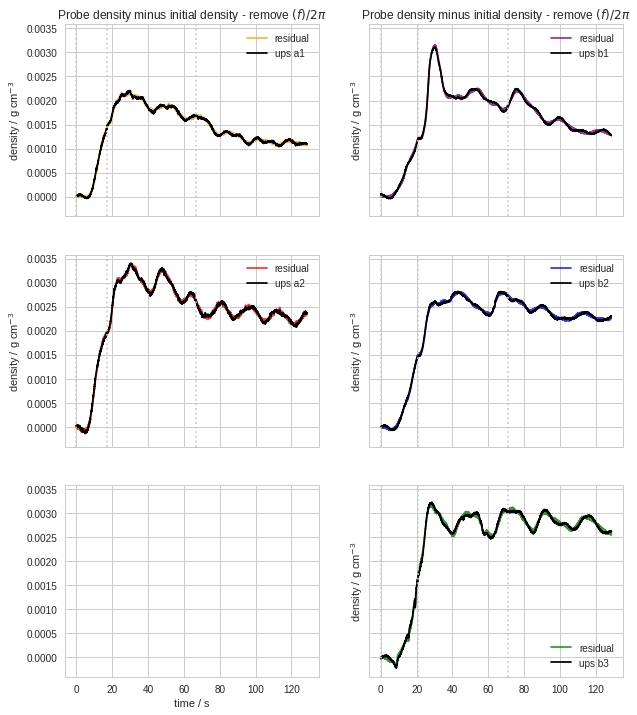

In [122]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(3,2, figsize=(10,12), sharey=True, sharex=True)
labels = [['ups a1','downs a1'],['ups a2', 'downs a2'],['ups b1', 'downs b1'],
          ['ups b2', 'downs b2'],['ups b3', 'downs b3']]
colors = ['orange','red','purple', 'blue', 'green']
axs = [ax0,ax2,ax1,ax3,ax5]
forcing = ['a','a','b','b','b']
fs = [0.7,0.7,0.5,0.5,0.5]
for lab, col, ii, ax, forc, f in zip(labels, colors, range(len(colors)), axs, forcing, fs):
    
    f0 = (f)/(2*np.pi) # f/2 is omega, table speed in rad/s, /2pi to get rid of rad
   
    res_ups, har_ups = ctools.filter_freq(times[:,ii],ups_density[:,ii]-ups_density[:,ii][0],f0)
    ax.plot(times[:,ii],ups_density[:,ii]-ups_density[:,ii][0],'-', label='residual', color=col, alpha=0.8)
    ax.plot(times[:,ii],res_ups,'-', label=lab[0], color='k')
    
    if forc == 'a':
        plot_uprofile(ax,t0_a,t1_a)
    else:
        plot_uprofile(ax,t0_b,t1_b)

    ax.legend()
    ax.set_ylabel('density / g cm$^{-3}$')
ax4.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density - remove $(f)/2\pi$')
ax1.set_title('Probe density minus initial density - remove $(f)/2\pi$')

Text(0.5,1,'Probe density minus initial density - remove $(f)/2\\pi$')

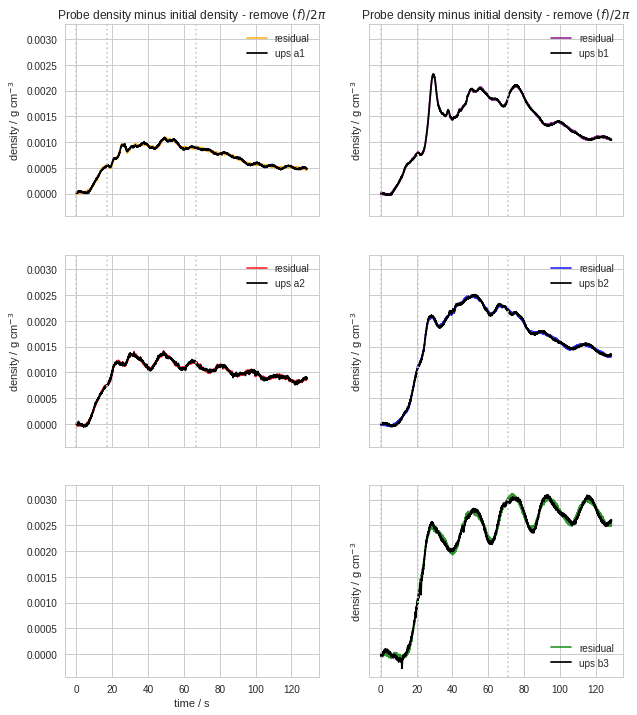

In [123]:
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(3,2, figsize=(10,12), sharey=True, sharex=True)
labels = [['ups a1','downs a1'],['ups a2', 'downs a2'],['ups b1', 'downs b1'],
          ['ups b2', 'downs b2'],['ups b3', 'downs b3']]
colors = ['orange','red','purple', 'blue', 'green']
axs = [ax0,ax2,ax1,ax3,ax5]
forcing = ['a','a','b','b','b']
fs = [0.7,0.7,0.5,0.5,0.5]
for lab, col, ii, ax, forc, f in zip(labels, colors, range(len(colors)), axs, forcing, fs):
    
    f0 = (f)/(2*np.pi) # f/2 is omega, table speed in rad/s, /2pi to get rid of rad
   
    res_ups, har_ups = ctools.filter_freq(times[:,ii],dns_density[:,ii]-dns_density[:,ii][0],f0)
    ax.plot(times[:,ii],dns_density[:,ii]-dns_density[:,ii][0],'-', label='residual', color=col, alpha=0.8)
    ax.plot(times[:,ii],res_ups,'-', label=lab[0], color='k')
    
    if forc == 'a':
        plot_uprofile(ax,t0_a,t1_a)
    else:
        plot_uprofile(ax,t0_b,t1_b)

    ax.legend()
    ax.set_ylabel('density / g cm$^{-3}$')
ax4.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density - remove $(f)/2\pi$')
ax1.set_title('Probe density minus initial density - remove $(f)/2\pi$')